<a href="https://colab.research.google.com/github/vidatriaaa/RevoU_Mini_COurse/blob/main/SalesData_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data and Cleaning

## Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import for download files
df = pd.read_csv('Sales Data.csv')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


## Cleaning data

In [ ]:
# Checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


Masih terdapat tipe data yang tidak sesuai yaitu pada bagian ORDERDATE untuk itu kita perbaiki terlebiih dahulu dengan mengubah tipe data nya menjadi datetime

In [3]:
# change data type

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 220.8+ KB


In [4]:
# new variable Revenue

df['REVENUE'] = df['QUANTITYORDERED'] * df['PRICEEACH']

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


## Check typo in data

In [5]:
for col_name in ['STATUS','PRODUCTLINE','CUSTOMERNAME', 'CITY','DEALSIZE']:
  print(df[col_name].value_counts(),'\n')


STATUS
Shipped       2618
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64 

PRODUCTLINE
Classic Cars        967
Vintage Cars        608
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64 

CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Auto-Moto Classics Inc.           8
Royale Belge                      8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: count, Length: 92, dtype: int64 

CITY
Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
                 ... 
South Brisbane     15
Los Angeles        14
Munich       

# Explonatory Data Analysis

## Which Product Line which have HIghest and Lowest Sale

### Based on Quantity

In [6]:
df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

PRODUCTLINE
Classic Cars        33992
Vintage Cars        21097
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Ships                8127
Trains               2712
Name: QUANTITYORDERED, dtype: int64

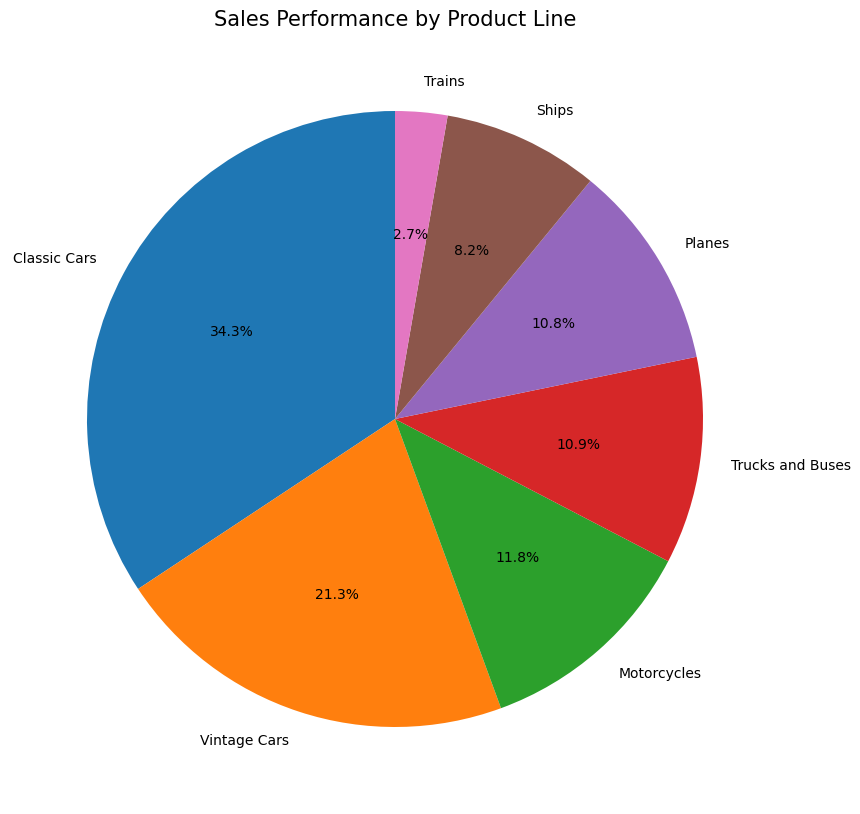

In [ ]:
# prompt: create a pie chart for highest sales based on quantity order

# group by productline
product = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

# plot pie chart
plt.figure(figsize=(10,10))
plt.pie(product.values, labels=product.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Performance by Product Line', fontsize=15)
plt.show()


In [8]:
# group by productline
product = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

product

PRODUCTLINE
Classic Cars        33992
Vintage Cars        21097
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Ships                8127
Trains               2712
Name: QUANTITYORDERED, dtype: int64

Classic cars are the highest sales
Trains are the lowest sales

### Based on Revenue

In [ ]:
df.groupby('PRODUCTLINE')['REVENUE'].sum().sort_values(ascending=False)

PRODUCTLINE
Classic Cars        2968546.40
Vintage Cars        1646013.29
Motorcycles          971086.29
Trucks and Buses     947355.18
Planes               877942.21
Ships                677940.40
Trains               203804.26
Name: REVENUE, dtype: float64

## Perfomance overtime

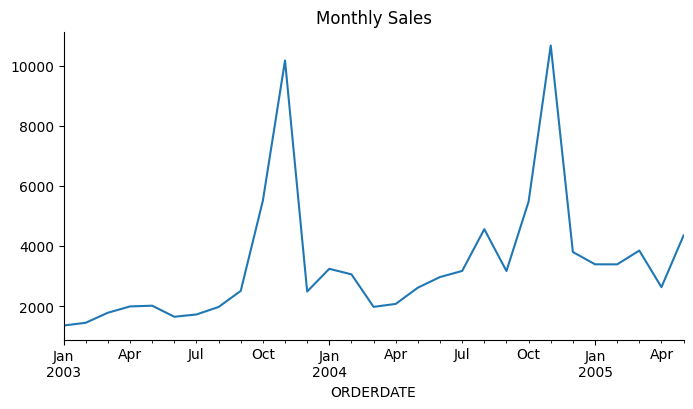

In [9]:
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))[['REVENUE','QUANTITYORDERED']].sum()

# show the plot

from matplotlib import pyplot as plt
monthly_sales['QUANTITYORDERED'].plot(kind='line', figsize=(8, 4), title='Monthly Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

### Monthly by Quantity

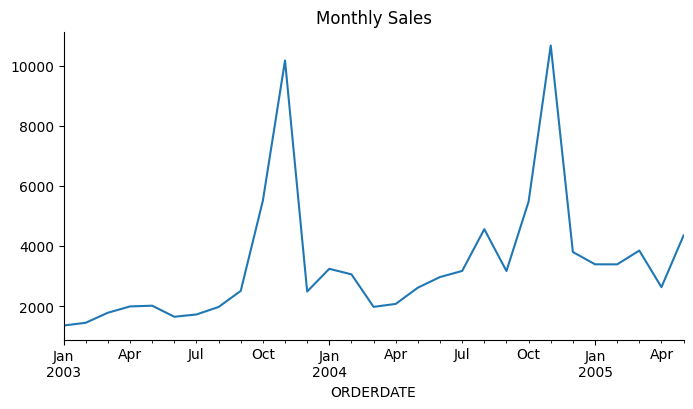

In [ ]:
# Sales perfomance by quantity

from matplotlib import pyplot as plt
monthly_sales['QUANTITYORDERED'].plot(kind='line', figsize=(8, 4), title='Monthly Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

Penjualan bulanan terbanyak terjadi pada bulan November tahun 2004 yaitu sebesar 10678 item terjual.

### Yearly by Quantity

In [ ]:
yearly_sales = df.groupby(df['ORDERDATE'].dt.to_period('Y'))[['REVENUE','QUANTITYORDERED']].sum()

yearly_sales

,REVENUE,QUANTITYORDERED
ORDERDATE,,
2003,2899951.18,34640
2004,3913700.87,46824
2005,1479035.98,17631


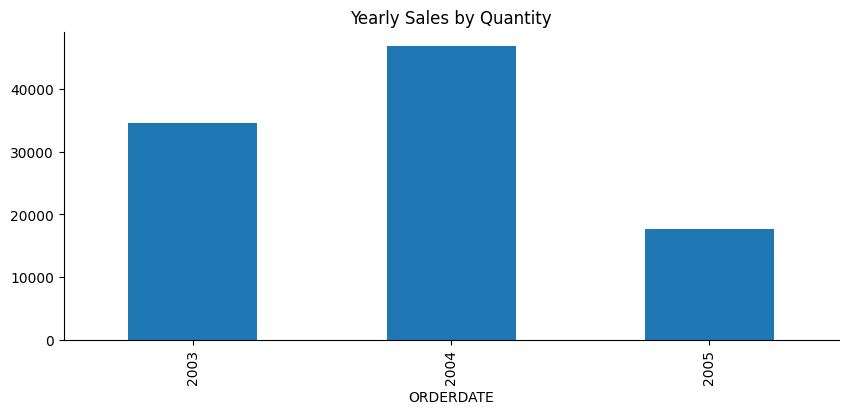

In [ ]:
# prompt: create line chart for yeaarly sales by quantityordered

# group by yearly
yearly_sales = df.groupby(df['ORDERDATE']C)[['REVENUE','QUANTITYORDERED']].sum()

# plot line chart for yearly sales by quantityordered
yearly_sales['QUANTITYORDERED'].plot(kind='bar', figsize=(10, 4), title='Yearly Sales by Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)


Penjualan tertinggi terjadi pada tahun 2004 yaitu sebesar 46824 item

### Perfomance aggregat by productline

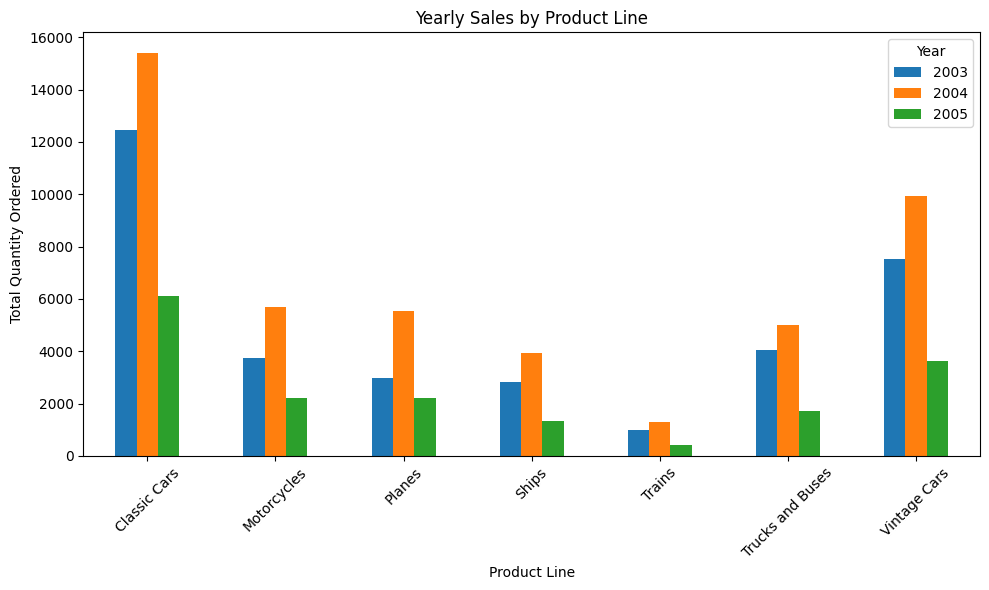

In [57]:
# prompt: create bar plot that desrcribe which productline that highest sales by year

# group by productline and year, then sum the quantity ordered
product_yearly = df.groupby(['PRODUCTLINE', df['ORDERDATE'].dt.year])['QUANTITYORDERED'].sum().unstack()

# plot bar chart
product_yearly.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [42]:
# prompt: Using dataframe product_yearly: sort descending

product_yearly.sort_values(by=2003, ascending=False) # Sort by values in 2003 column


ORDERDATE,2003,2004,2005
PRODUCTLINE,,,
Classic Cars,12473,15418,6101
Vintage Cars,7532,9950,3615
Trucks and Buses,4056,5002,1719
Motorcycles,3739,5690,2234
Planes,2996,5524,2207
Ships,2844,3937,1346
Trains,1000,1303,409


Secara agggregat Classic Cars merupakan product line dengan total penjualan tertinggi di setiap tahun nya

dengan urutan pola dari yang tertinggi ke terendah yaitu :
Classic Cars dan Vintage Cars selalu memimpin di peringkat 1 dan 2, Planes Ships and Trains selalu di peringkat terendah, dan motorcyles pada tahun 2003 mengalami penjualan yang lebih rendah dibanding Truck and Busses namun tahun 2004 dan 2005 mengalami peningkatan penjualan dan berhasil lebih unggul dari Trucks and Busses

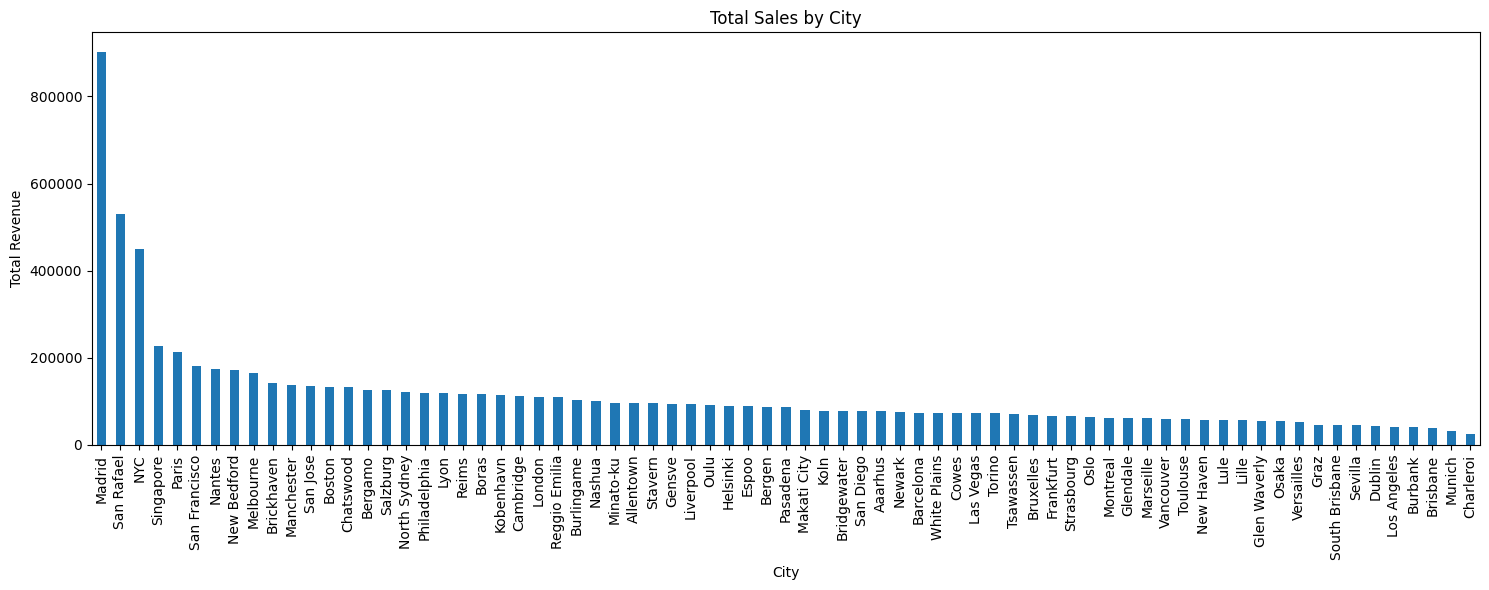

CITY
Madrid    902094.19
Name: REVENUE, dtype: float64


In [40]:
# prompt: where is city with the highest sales overtime

city_sales = df.groupby('CITY')['REVENUE'].sum().sort_values(ascending=False)

# plot bar chart
plt.figure(figsize=(15, 6))
city_sales.plot(kind='bar')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(city_sales.head(1))


In [47]:
# prompt: how does dealsize correlate with total sales

# Group by dealsize and calculate total revenue
dealsize_sales = df.groupby('DEALSIZE')['REVENUE'].sum()


dealsize_sales

DEALSIZE
Large      738757.91
Medium    4961736.68
Small     2592193.44
Name: REVENUE, dtype: float64

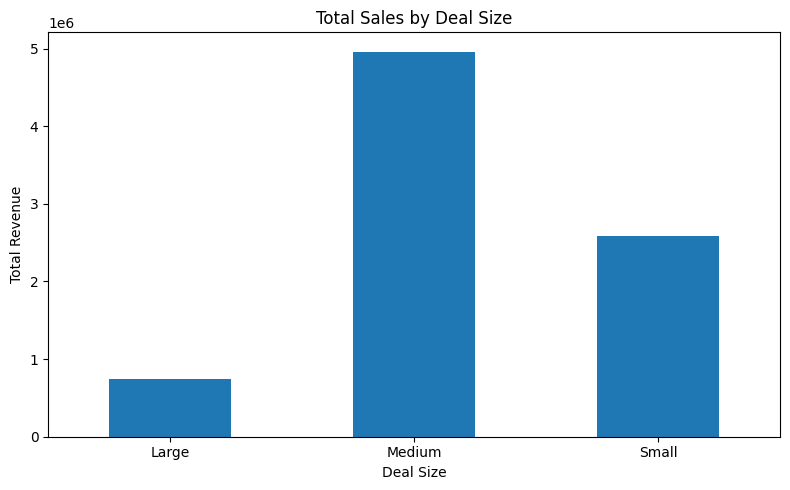

Correlation between Deal Size and Revenue: -0.7857173854555282


In [55]:
# Plot bar chart
plt.figure(figsize=(8, 5))
dealsize_sales.plot(kind='bar')
plt.title('Total Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate correlation between deal size and revenue
correlation = df['DEALSIZE'].astype('category').cat.codes.corr(df['REVENUE'])
print("Correlation between Deal Size and Revenue:", correlation)

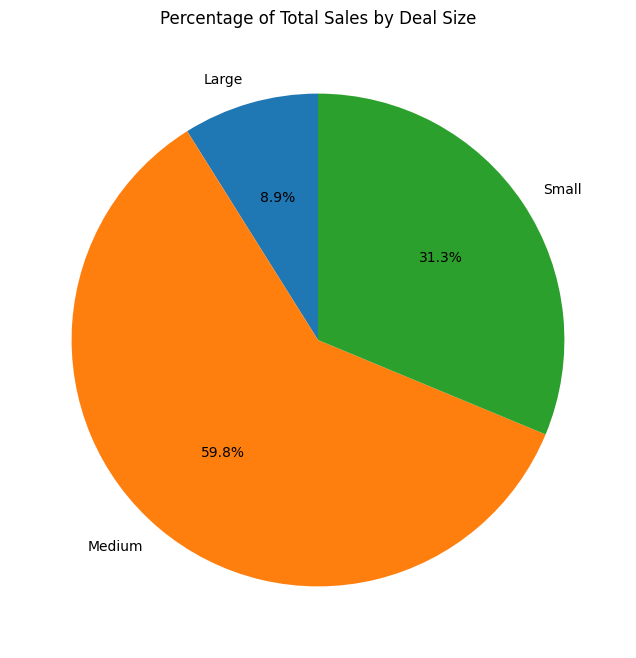

In [10]:
# prompt: what is the percentage contribution for each type of deal

# Calculate total revenue
total_revenue = df['REVENUE'].sum()

# Group by dealsize and calculate total revenue for each deal size
dealsize_sales = df.groupby('DEALSIZE')['REVENUE'].sum()

# Calculate percentage contribution for each deal size
dealsize_percentage = (dealsize_sales / total_revenue) * 100

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(dealsize_percentage, labels=dealsize_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Sales by Deal Size')
plt.show()




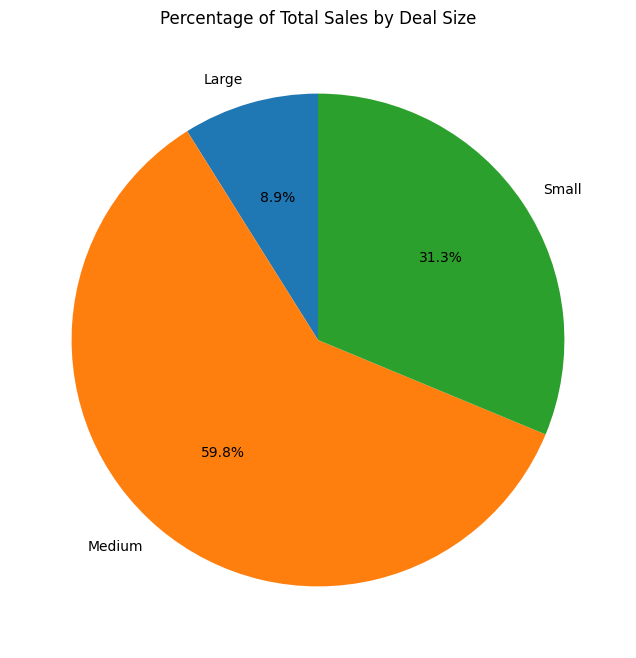

In [51]:
# prompt: create pie chart for dealsize percentage

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(dealsize_percentage, labels=dealsize_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Sales by Deal Size')
plt.show()


pendapatan terbesar berasal dari skala medium, yaitu sebesar 59,8%